In [44]:
import cv2, numpy as n
from torch_snippets import *
import matplotlib.pyplot as plt
%matplotlib inline

# Drawing_bounding_boxes_around_words_in_an_image

In [24]:
file_path = "10\\18_5.JPG"

In [27]:
img = read(file_path)

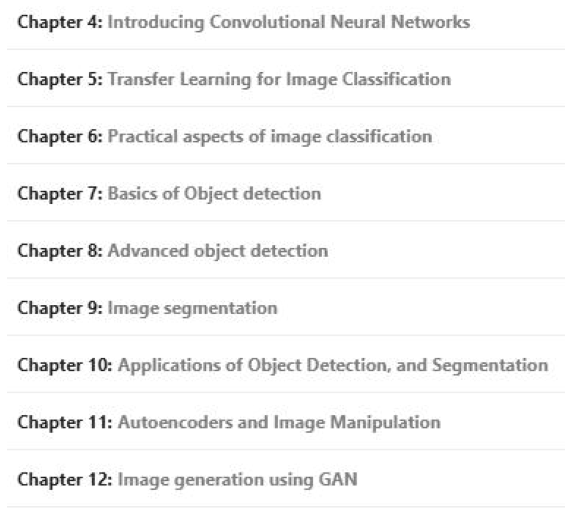

In [45]:
show(img)

# OCR

In [32]:
import easyocr

In [35]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [39]:
result = reader.readtext(file_path)

In [41]:
len(result)

9

In [43]:
result[0][1]

'Chapter 4: Introducing Convolutional Neural Networks'

# Continuing with Drawing boxes

In [49]:
img = cv2.imread(file_path)

In [51]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

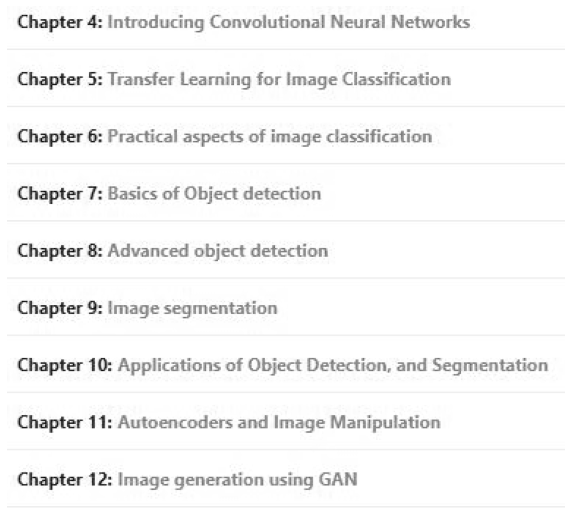

In [53]:
show(img_gray)

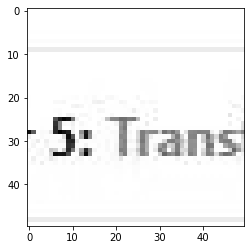

In [54]:
crop = img_gray[20:70,50:100]
plt.imshow(crop,cmap='gray')
     

In [55]:
# Clearly noise present, will remove that noise

In [96]:
## binarization: set all pixels below a certain threshold to 0 and rest above 255


_img_gray = np.uint8(img_gray<200) * 255

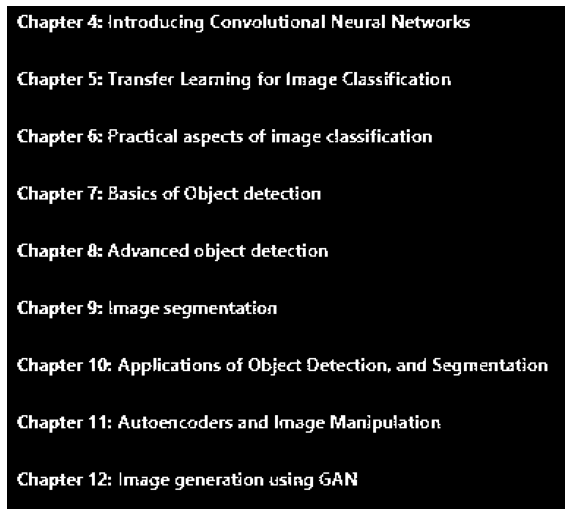

In [97]:
show(_img_gray)

In [98]:
# Will use the above image now for drawing bboxes around words

In [99]:
cv2.findContours?

Docstring:
findContours(image, mode, method[, contours[, hierarchy[, offset]]]) -> contours, hierarchy
.   @brief Finds contours in a binary image.
.   
.   The function retrieves contours from the binary image using the algorithm @cite Suzuki85 . The contours
.   are a useful tool for shape analysis and object detection and recognition. See squares.cpp in the
.   OpenCV sample directory.
.   @note Since opencv 3.2 source image is not modified by this function.
.   
.   @param image Source, an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero
.   pixels remain 0's, so the image is treated as binary . You can use #compare, #inRange, #threshold ,
.   #adaptiveThreshold, #Canny, and others to create a binary image out of a grayscale or color one.
.   If mode equals to #RETR_CCOMP or #RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1).
.   @param contours Detected contours. Each contour is stored as a vector of points (e.g.
.   std::vector<

In [100]:
# cv2.contours finds contours by creating a collection 
# of a continuous set of pixels as a single blob

In [101]:
contours, hierarchy = cv2.findContours(_img_gray,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [102]:
# Convert threshold greyscale image to 3 channels.

In [103]:
thresh1 = np.stack([_img_gray]*3, axis = 2)

In [104]:
thresh1.shape

(343, 381, 3)

In [105]:
# Create a blank image on top of which we will copy relevant info

In [106]:
thresh2 = np.zeros((thresh1.shape[0],thresh1.shape[1]))

In [107]:
thresh2.shape

(343, 381)

In [108]:
len(contours)

346

In [109]:
contours[0]

array([[[ 69, 325]],

       [[ 69, 326]],

       [[ 70, 326]],

       [[ 70, 325]]], dtype=int32)

In [110]:
cv2.contourArea(contours[0])

1.0

In [111]:
cv2.boundingRect(contours[0])

(69, 325, 2, 2)

In [112]:
for cnt in contours:
    if cv2.contourArea(cnt) > 0:
        [x,y,w,h] = cv2.boundingRect(cnt)
        
        if (h>5) & (h<100):
            # copying those pixels which contain words
            thresh2[y:(y+h),x:(x+w)] = thresh1[y:(y+h),x:(x+w),0].copy()  # copying in 0th channel
            # drawing bounding box around word
            cv2.rectangle(thresh1,(x,y),(x+w,y+h),(255,0,0),2)

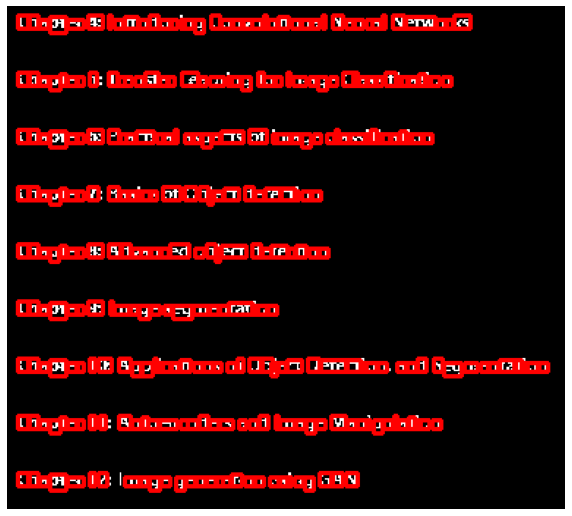

In [113]:
show(thresh1)

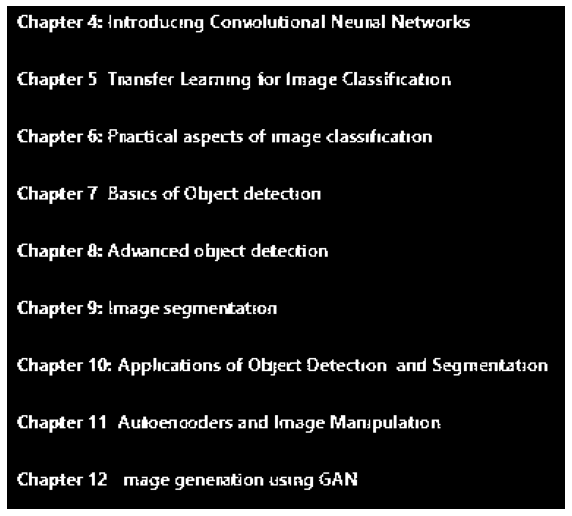

In [114]:
show(thresh2)

In [115]:
# Word Dilation: Will bleed some data into neighbouring pixels
# This will ensure that characters belonging to same word form a single blob

In [116]:

dilated = cv2.dilate(thresh2, np.ones((1,2),np.uint8), iterations=1)

In [118]:
# np.ones define the kernel size. kernel size is 1 row and 2 cols. 
# If we increase this, bleeding will be high and we might connect different words
# which is not desirable.

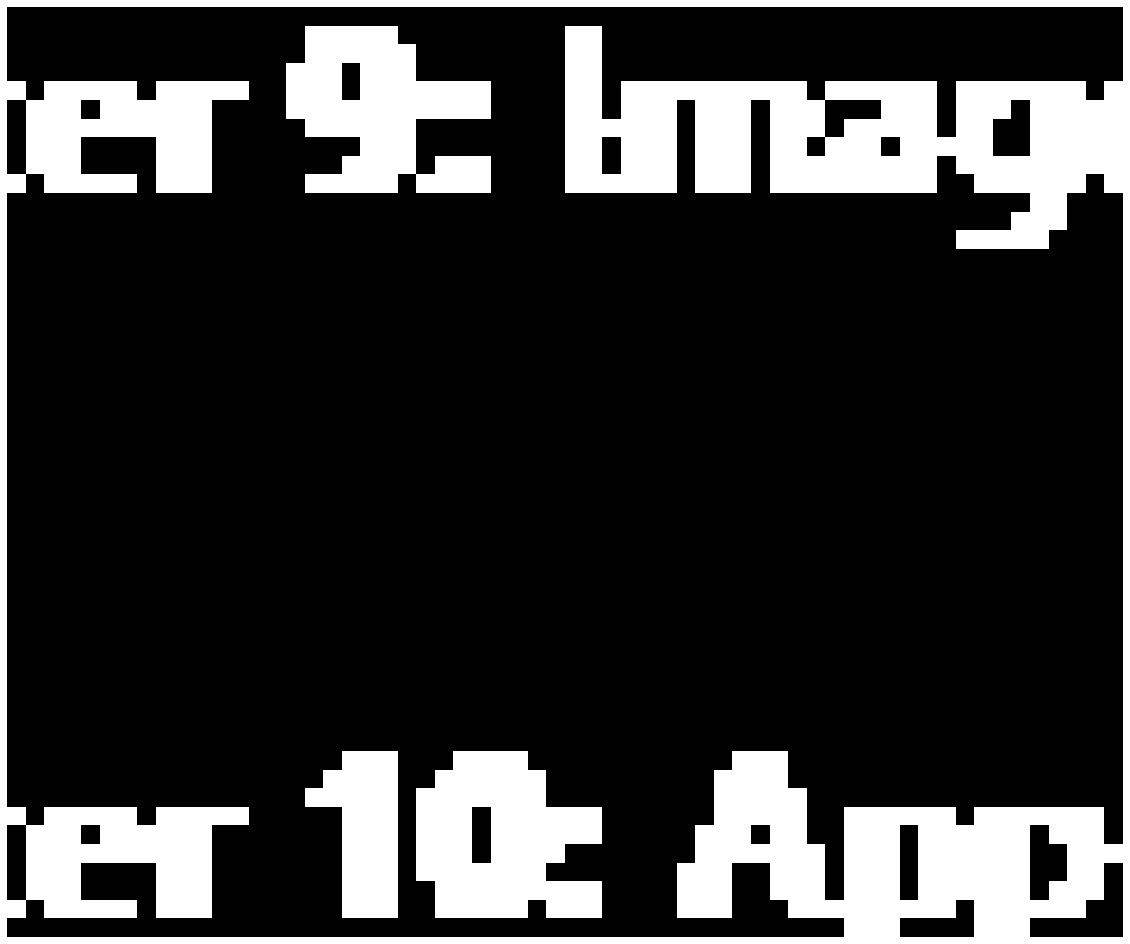

In [128]:
show(dilated[200:250,40:100], sz= 20)

In [129]:

contours,hierarchy = cv2.findContours(np.uint8(dilated),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [131]:

for cnt in contours:
    if cv2.contourArea(cnt)>5:
        [x,y,w,h] = cv2.boundingRect(cnt)
        if ((h>5) & (h<100)):
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

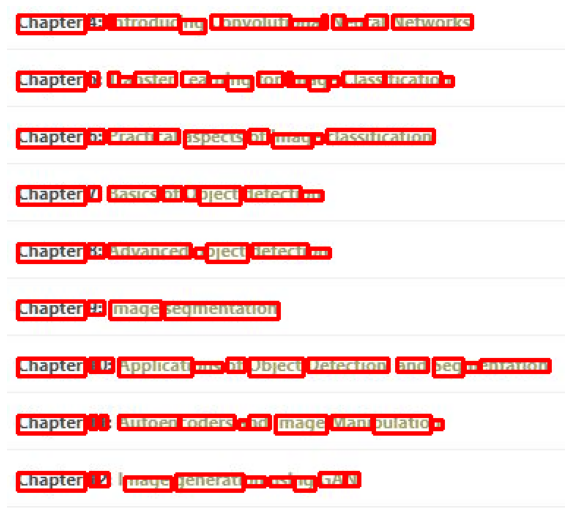

In [132]:
show(img)